<a href="https://colab.research.google.com/github/itsvivekghosh/Bankrupt-Classification/blob/master/Bankrupt_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Data



## Data Set Information:
The dataset is about bankruptcy prediction of Polish companies. The data was collected from Emerging Markets Information Service (EMIS, [Web Link]), which is a database containing information on emerging markets around the world. The bankrupt companies were analysed in the period 2000-2012, while the still operating companies were evaluated from 2007 to 2013.
Basing on the collected data five classification cases were distinguished, that depends on the forecasting period:
- 1stYear the data contains financial rates from 1st year of the forecasting period and corresponding class label that indicates bankruptcy status after 5 years. The data contains 7027 instances (financial statements), 271 represents bankrupted companies, 6756 firms that did not bankrupt in the forecasting period.
- 2ndYear  the data contains financial rates from 2nd year of the forecasting period and corresponding class label that indicates bankruptcy status after 4 years. The data contains 10173 instances (financial statements), 400 represents bankrupted companies, 9773 firms that did not bankrupt in the forecasting period.
- 3rdYear  the data contains financial rates from 3rd year of the forecasting period and corresponding class label that indicates bankruptcy status after 3 years. The data contains 10503 instances (financial statements), 495 represents bankrupted companies, 10008 firms that did not bankrupt in the forecasting period.
- 4thYear the data contains financial rates from 4th year of the forecasting period and corresponding class label that indicates bankruptcy status after 2 years. The data contains 9792 instances (financial statements), 515 represents bankrupted companies, 9277 firms that did not bankrupt in the forecasting period.
- 5thYear  the data contains financial rates from 5th year of the forecasting period and corresponding class label that indicates bankruptcy status after 1 year. The data contains 5910 instances (financial statements), 410 represents bankrupted companies, 5500 firms that did not bankrupt in the forecasting period.


In [1]:
### import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
%matplotlib inline
import numpy

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
###linking google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
## reading all datasets
year1=pd.read_csv("/content/drive/My Drive/Bankruptcy dataset.zip (Unzipped Files)/Bankruptcy dataset/1year.csv")
year2=pd.read_csv("/content/drive/My Drive/Bankruptcy dataset.zip (Unzipped Files)/Bankruptcy dataset/2year.csv")
year3=pd.read_csv("/content/drive/My Drive/Bankruptcy dataset.zip (Unzipped Files)/Bankruptcy dataset/3year.csv")
year4=pd.read_csv("/content/drive/My Drive/Bankruptcy dataset.zip (Unzipped Files)/Bankruptcy dataset/4year.csv")
year5=pd.read_csv("/content/drive/My Drive/Bankruptcy dataset.zip (Unzipped Files)/Bankruptcy dataset/5year.csv")
print(year1.shape, year2.shape, year3.shape, year4.shape, year5.shape)

(7012, 65) (10173, 65) (10476, 65) (9539, 65) (5427, 65)


In [4]:
## merging all datasets
df=pd.concat([year1, year2, year3, year4, year5], axis=0)
df.shape

(42627, 65)

In [5]:
## head of dataset
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,0.50494,0.24976,0.6598,0.1666,0.24976,497.42,0.73378,2.6349,0.24976,0.14942,43.37,1.2479,0.21402,0.11998,0.47706,0.50494,0.60411,1.4582,1.7615,5.9443,0.11788,0.14942,94.14,3.8772,0.56393,0.21402,1.741,593.27,0.50591,0.12804,0.66295,0.051402,0.12804,114.42,71.05,1.0097,1.5225,49.394,0.1853,0.11085,2.042,0.37854,0.25792,2.2437,2.248,348690,0.12196,0.39718,0.87804,0.001924,8.416,5.1372,82.658,4.4158,7.4277,0
1,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,0.49788,0.26114,0.5168,0.15835,0.25834,677.96,0.53838,2.0005,0.25834,0.152,87.981,1.4293,0.24806,0.12304,?,0.39542,0.43992,88.444,16.946,3.6884,0.26969,0.152,122.17,2.9876,2.9876,0.20616,1.6996,?,0.49788,0.1213,0.086422,0.064371,0.14595,199.49,111.51,0.51045,1.1252,100.13,0.23727,0.13961,1.9447,0.49988,0.33472,17.866,17.866,2304.6,0.1213,0.42002,0.853,0,4.1486,3.2732,107.35,3.4,60.987,0
2,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,0.30408,0.31258,0.64184,0.24435,0.30906,794.16,0.45961,1.4369,0.30906,0.2361,73.133,1.4283,0.3026,0.18996,?,0.28932,0.37282,86.011,1.0627,4.3749,0.41929,0.23815,176.93,2.063,1.4274,0.31565,1.309,2.3019,0.51537,0.24114,0.32202,0.07402,0.23117,165.51,92.381,0.94807,1.0101,96.372,0.29181,0.22293,1.0758,0.48152,0.48474,1.2098,2.0504,6332.7,0.24114,0.81774,0.76599,0.69484,4.9909,3.951,134.27,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,0.57353,0.092704,0.30163,0.094257,0.092704,917.01,0.39803,3.2537,0.092704,0.071428,79.788,1.5069,0.1155,0.062782,0.17193,0.57353,0.36152,0.94076,1.9618,4.6511,0.14343,0.071428,91.37,3.9948,0.37581,0.1155,1.3562,?,0.57353,0.088995,0.40139,0.069622,0.088995,180.77,100.98,0.2872,1.5696,84.344,0.085874,0.066165,2.4928,0.30734,0.25033,2.4524,2.4524,20545,0.054015,0.14207,0.94598,0,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,0.38677,0.18732,0.33147,0.12182,0.18732,1133.2,0.32211,1.6307,0.18732,0.11553,57.045,?,0.19832,0.11553,0.18732,0.38677,0.32211,1.4138,1.1184,4.1424,0.27884,0.11553,147.04,2.4823,0.3234,0.19832,1.6278,11.247,0.43489,0.12231,0.29304,0.09668,0.12231,141.62,84.574,0.73919,0.95787,65.936,0.18811,0.11601,1.2959,0.56511,0.40285,1.8839,2.1184,3186.6,0.13485,0.48431,0.86515,0.12444,6.3985,4.3158,127.21,2.8692,7.898,0


In [0]:
### looks like our dataset is not clean as it contains many '?' data in each column...
### therefore cleaning data

## Data Cleaning

In [7]:
## calculating the total columns in the dataset
cols = [x for x in df.columns]
len(cols)

65

In [0]:
## replacing all the '?' with nan values and that nan values with the median of the particular dataset
for feature in cols:
    df[feature]=df[feature].replace(to_replace='?', value=np.nan)
for col in cols:
    df[col]=df[col].replace(to_replace=np.nan, value=df[col].median())

In [9]:
## head of transformed data
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,0.50494,0.24976,0.6598,0.1666,0.24976,497.42,0.73378,2.6349,0.24976,0.14942,43.37,1.2479,0.21402,0.11998,0.47706,0.50494,0.60411,1.4582,1.7615,5.9443,0.11788,0.14942,94.14,3.8772,0.56393,0.21402,1.741,593.27,0.50591,0.12804,0.66295,0.051402,0.12804,114.42,71.05,1.0097,1.5225,49.394,0.1853,0.11085,2.042,0.37854,0.25792,2.2437,2.248,348690,0.12196,0.39718,0.87804,0.001924,8.416,5.1372,82.658,4.4158,7.4277,0
1,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,0.49788,0.26114,0.5168,0.15835,0.25834,677.96,0.53838,2.0005,0.25834,0.152,87.981,1.4293,0.24806,0.12304,0.155215,0.39542,0.43992,88.444,16.946,3.6884,0.26969,0.152,122.17,2.9876,2.9876,0.20616,1.6996,3.0745,0.49788,0.1213,0.086422,0.064371,0.14595,199.49,111.51,0.51045,1.1252,100.13,0.23727,0.13961,1.9447,0.49988,0.33472,17.866,17.866,2304.6,0.1213,0.42002,0.853,0,4.1486,3.2732,107.35,3.4,60.987,0
2,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,0.30408,0.31258,0.64184,0.24435,0.30906,794.16,0.45961,1.4369,0.30906,0.2361,73.133,1.4283,0.3026,0.18996,0.155215,0.28932,0.37282,86.011,1.0627,4.3749,0.41929,0.23815,176.93,2.063,1.4274,0.31565,1.309,2.3019,0.51537,0.24114,0.32202,0.07402,0.23117,165.51,92.381,0.94807,1.0101,96.372,0.29181,0.22293,1.0758,0.48152,0.48474,1.2098,2.0504,6332.7,0.24114,0.81774,0.76599,0.69484,4.9909,3.951,134.27,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,0.57353,0.092704,0.30163,0.094257,0.092704,917.01,0.39803,3.2537,0.092704,0.071428,79.788,1.5069,0.1155,0.062782,0.17193,0.57353,0.36152,0.94076,1.9618,4.6511,0.14343,0.071428,91.37,3.9948,0.37581,0.1155,1.3562,3.0745,0.57353,0.088995,0.40139,0.069622,0.088995,180.77,100.98,0.2872,1.5696,84.344,0.085874,0.066165,2.4928,0.30734,0.25033,2.4524,2.4524,20545,0.054015,0.14207,0.94598,0,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,0.38677,0.18732,0.33147,0.12182,0.18732,1133.2,0.32211,1.6307,0.18732,0.11553,57.045,1.0438,0.19832,0.11553,0.18732,0.38677,0.32211,1.4138,1.1184,4.1424,0.27884,0.11553,147.04,2.4823,0.3234,0.19832,1.6278,11.247,0.43489,0.12231,0.29304,0.09668,0.12231,141.62,84.574,0.73919,0.95787,65.936,0.18811,0.11601,1.2959,0.56511,0.40285,1.8839,2.1184,3186.6,0.13485,0.48431,0.86515,0.12444,6.3985,4.3158,127.21,2.8692,7.898,0


### Exploratory Data Analysis

In [10]:
### no. of features except 'class'
cols = [x for x in df.columns if(x!='class')]
len(cols)

64

In [0]:
### converting the object features to value features by converting each value to float value
for feature in cols:
    df[feature]=df[feature].apply(lambda x: float(x))

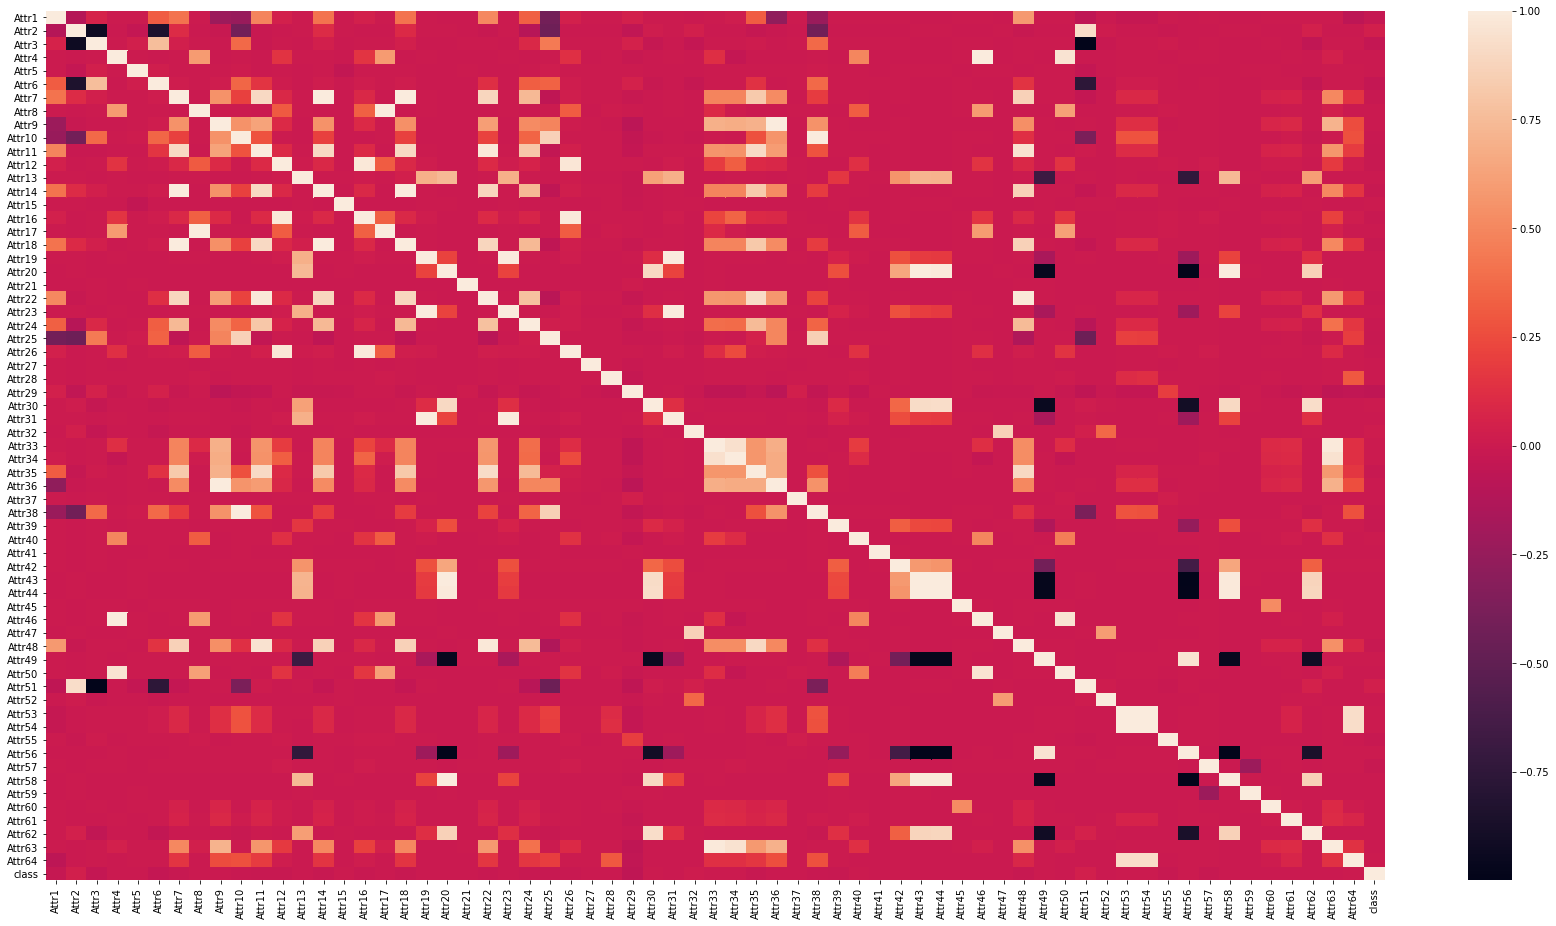

In [12]:
### Data Correlation Plot
plt.figure(figsize=(30, 16))
sns.heatmap(df.corr())
plt.show()

### Data Preprocessing

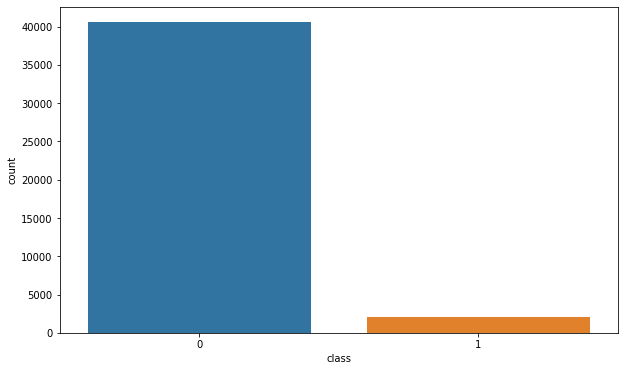

In [13]:
### plotting the count of each fetaure..
plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=df)

As we can see that class 1 data has less samples as compared to class 0 samples. That means, we do have less samples for bankrupt analysis. Hence, this is an imbalanced dataset. 

- So, we do have to modify the imbalanced dataset to a balanced datasetby  either by:
    - Down Sampling or by,
    - Up Sampling.

I chose to go with upsampling using RandomOverSampler

In [14]:
## Original Dataset count of each class
from collections import Counter
print("Original Dataset Shape: {}".format(Counter(df['class'])))

Original Dataset Shape: Counter({0: 40578, 1: 2049})


In [0]:
### Diving the features as independent and dependent features
X=df.iloc[:, :-1] ## independent features
y=pd.DataFrame(df.iloc[:, -1], columns=['class'])  ## dependent features

In [0]:
### Random Over-Sampling
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(random_state=42)   ## Over-Sampling 
X_os, y_os=os.fit_sample(X, y)   ## random-sampling of X, y

In [17]:
### the original and over-sampled class count
print("Original Dataset Shape: {}".format(Counter(df['class'])))  ## original sample dataset
print("OverSample Dataset Shape: {}".format(Counter(y_os)))  ## over-sampled dataset

Original Dataset Shape: Counter({0: 40578, 1: 2049})
OverSample Dataset Shape: Counter({0: 40578, 1: 40578})


In [18]:
### Data scaling using Standard Scalar
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc=StandardScaler() ## scaling down the features
sc ## scaler-object

StandardScaler(copy=True, with_mean=True, with_std=True)

In [19]:
X_os=pd.DataFrame(sc.fit_transform(X_os), columns=[X.columns])  ### Scaling the X_os ie. oversampled dataset
X_os.shape, y_os.shape  ##shape of transformed oversampled dataset

((81156, 64), (81156,))

In [20]:
### Splitting of Dataset into the train and test datasets at a threshold of 80% of train and 20% to be test dataset..
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test=tts(X_os, y_os, test_size=0.2, random_state=0) ### train-test-split
print(X_train.shape, X_test.shape) ## finding each shape

(64924, 64) (16232, 64)


# DATA MODELING

Data Modeling is the step in which we fit the model and find the best estimator for the dataset(classification in this case).

So, this is performed according the accuracy scores attained byeach estimator.
The Chosen Classifying algorithmss are:
1. RandomForest Classifier
2. XGB Classifier
3. KNearest Neighbor Classifier
4. Decision Tree Classifier.

In [0]:
accuracies_=[]
r2_scores=[]
algorithms=[]

In [0]:
### importing necessary libraries
from sklearn.model_selection import cross_val_score ### for cross-validtion over the samples
from sklearn.metrics import r2_score, accuracy_score, classification_report, confusion_matrix ### generating the reports like r2-Scores, accuracies and confusion-scores
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV ### Hyper-Parameter Tuning 
from xgboost import XGBClassifier ## XGB CLassifier from XGBoost Lib.
from sklearn.neighbors import KNeighborsClassifier ## KNeighbor Classifier from neighbor lib.
from sklearn.tree import DecisionTreeClassifier ### Decision Tree Classifier from tree lib.
from sklearn.ensemble import RandomForestClassifier ## importing Random-Forest Classifier from ensemble lib.

# 1. Random Forest Classifier

In [23]:
### Random-Forest Classifier
rf=RandomForestClassifier() ## making object
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy Score: 0.9965500246426812
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7981
           1       1.00      0.99      1.00      8251

    accuracy                           1.00     16232
   macro avg       1.00      1.00      1.00     16232
weighted avg       1.00      1.00      1.00     16232

Confusion Matrix: 
AxesSubplot(0.125,0.125;0.62x0.755)


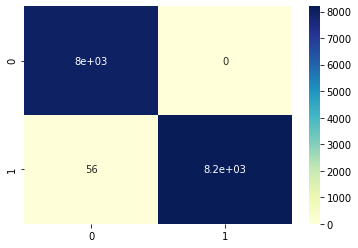

In [24]:
accuracies=cross_val_score(estimator=rf, X=X_test, y=y_test, cv=10) ## generating the accuracies using cross_val_score

###  Predicting the test-values
y_pred=rf.predict(X_test)
r2_scores.append(r2_score(y_pred, y_test))
algorithms.append("Random Forest Classifier")
accuracies_.append(accuracies.mean())
print("Accuracy Score: {}".format(accuracy_score(y_pred, y_test)))
print("Classification Report: \n{}".format(classification_report(y_pred, y_test)))
print("Confusion Matrix: \n{}".format(sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, cmap='YlGnBu')))

# 2. XG Boost Classifier

In [25]:
xgb=XGBClassifier(n_estimators=200, max_depth=10, learning_rate=0.5) ### XGB Classifier model
xgb.fit(X_train, y_train) ## fitting the dataset for prediction

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Accuracy Score: 0.9966116313454904
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7982
           1       1.00      0.99      1.00      8250

    accuracy                           1.00     16232
   macro avg       1.00      1.00      1.00     16232
weighted avg       1.00      1.00      1.00     16232

Confusion Matrix: 
AxesSubplot(0.125,0.125;0.62x0.755)


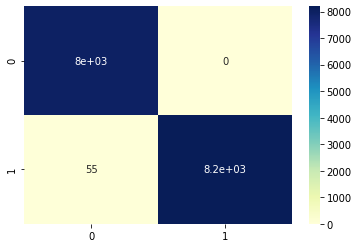

In [26]:
accuracies=cross_val_score(estimator=xgb, X=X_test, y=y_test, cv=10) ## generating the accuracies using cross_val_score

###  Predicting the test-values
y_pred=xgb.predict(X_test)
r2_scores.append(r2_score(y_pred, y_test))
algorithms.append("XG Boost Classifier")
accuracies_.append(accuracies.mean())
print("Accuracy Score: {}".format(accuracy_score(y_pred, y_test)))
print("Classification Report: \n{}".format(classification_report(y_pred, y_test)))
print("Confusion Matrix: \n{}".format(sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, cmap='YlGnBu')))

# 3. K Nearest Neighbor Classifier

In [27]:
knn=KNeighborsClassifier()
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [28]:
knn.fit(X_train, y_train) ## for KNNC model Fitting the samples
accuracies=cross_val_score(estimator=knn, X=X_test, y=y_test, cv=10)  ## generating the accuracies using cross_val_score
accuracies.mean()

0.7919547817852363

In [0]:
knn_accuracy=[]
for i in np.arange(1, 20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    accuracies=cross_val_score(estimator=knn, X=X_test, y=y_test, cv=10)
    knn_accuracy.append(accuracies.mean())

In [30]:
px.line(x=np.arange(1, 20), y=knn_accuracy).update_layout(
    title='Accuracy Scores according to the Number of neighbors', xaxis_title='No. of Neighbors', yaxis_title='Accuracy'
)

Accuracy Score: 0.9746796451453918
Classification Report: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      7626
           1       1.00      0.95      0.98      8606

    accuracy                           0.97     16232
   macro avg       0.97      0.98      0.97     16232
weighted avg       0.98      0.97      0.97     16232

Confusion Matrix: 
AxesSubplot(0.125,0.125;0.62x0.755)


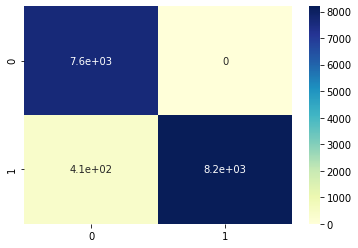

In [31]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

###  Predicting the test-values
y_pred=knn.predict(X_test) ## predicting the values of test-dataset
accuracies=cross_val_score(estimator=knn, X=X_test, y=y_test, cv=10)    ## generating the accuracies using cross_val_score
r2_scores.append(r2_score(y_pred, y_test))  ## calculating the r2_score
algorithms.append("K Nearest Neighbor Classifier")
accuracies_.append(accuracies.mean())
print("Accuracy Score: {}".format(accuracy_score(y_pred, y_test)))
print("Classification Report: \n{}".format(classification_report(y_pred, y_test)))
print("Confusion Matrix: \n{}".format(sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, cmap='YlGnBu')))

 # 4. Decision Tree Classifier

In [32]:
tree=DecisionTreeClassifier(max_depth=10)
tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
param_grid={
    'max_depth': [5, 8, 10, 12, 14, 16, 18, 20],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 12, 14, 30, 50, 100]
}

In [34]:
grid=RandomizedSearchCV(estimator=tree, param_distributions=param_grid, cv=10, verbose=5)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] max_depth=30, criterion=entropy .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... max_depth=30, criterion=entropy, score=0.984, total=   5.1s
[CV] max_depth=30, criterion=entropy .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s remaining:    0.0s


[CV] ..... max_depth=30, criterion=entropy, score=0.986, total=   5.0s
[CV] max_depth=30, criterion=entropy .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.1s remaining:    0.0s


[CV] ..... max_depth=30, criterion=entropy, score=0.982, total=   5.2s
[CV] max_depth=30, criterion=entropy .................................
[CV] ..... max_depth=30, criterion=entropy, score=0.987, total=   4.9s
[CV] max_depth=30, criterion=entropy .................................
[CV] ..... max_depth=30, criterion=entropy, score=0.984, total=   5.2s
[CV] max_depth=30, criterion=entropy .................................
[CV] ..... max_depth=30, criterion=entropy, score=0.986, total=   4.8s
[CV] max_depth=30, criterion=entropy .................................
[CV] ..... max_depth=30, criterion=entropy, score=0.984, total=   5.1s
[CV] max_depth=30, criterion=entropy .................................
[CV] ..... max_depth=30, criterion=entropy, score=0.985, total=   4.9s
[CV] max_depth=30, criterion=entropy .................................
[CV] ..... max_depth=30, criterion=entropy, score=0.984, total=   5.2s
[CV] max_depth=30, criterion=entropy .................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  6.9min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=10,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
           

In [35]:
print("Best Score: {}\nBest Parameters: {}".format(grid.best_score_, grid.best_params_))

Best Score: 0.9846897920021742
Best Parameters: {'max_depth': 30, 'criterion': 'entropy'}


In [36]:
tree=grid.best_estimator_
tree.fit(X_train, y_train)
accuracies=cross_val_score(estimator=tree, X=X_test, y=y_test, cv=10) ## generating the accuracies using cross_val_score
accuracies.mean()

0.949605805098507

Accuracy Score: 0.9871858058156727
Classification Report: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      7829
           1       1.00      0.98      0.99      8403

    accuracy                           0.99     16232
   macro avg       0.99      0.99      0.99     16232
weighted avg       0.99      0.99      0.99     16232

Confusion Matrix: 
AxesSubplot(0.125,0.125;0.62x0.755)


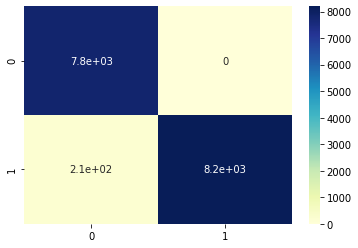

In [37]:
###  Predicting the test-values
y_pred=tree.predict(X_test)
r2_scores.append(r2_score(y_pred, y_test))
algorithms.append("Decision Tree Classifier")
accuracies_.append(accuracies.mean())
print("Accuracy Score: {}".format(accuracy_score(y_pred, y_test)))
print("Classification Report: \n{}".format(classification_report(y_pred, y_test)))
print("Confusion Matrix: \n{}".format(sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, cmap='YlGnBu')))

In [38]:
compare_df=pd.DataFrame(zip(algorithms, r2_scores, accuracies_), columns=['Algorithm', 'R2 Scores', 'Accuracy'])
compare_df

,Algorithm,R2 Scores,Accuracy
0,Random Forest Classifier,0.986196,0.975419
1,XG Boost Classifier,0.986443,0.981025
2,K Nearest Neighbor Classifier,0.898348,0.731705
3,Decision Tree Classifier,0.948679,0.949606


In [39]:
compare_df_melt=compare_df.melt(id_vars='Algorithm', value_vars=['R2 Scores', 'Accuracy'])
compare_df_melt

,Algorithm,variable,value
0,Random Forest Classifier,R2 Scores,0.986196
1,XG Boost Classifier,R2 Scores,0.986443
2,K Nearest Neighbor Classifier,R2 Scores,0.898348
3,Decision Tree Classifier,R2 Scores,0.948679
4,Random Forest Classifier,Accuracy,0.975419
5,XG Boost Classifier,Accuracy,0.981025
6,K Nearest Neighbor Classifier,Accuracy,0.731705
7,Decision Tree Classifier,Accuracy,0.949606


In [40]:
px.line(data_frame=compare_df_melt, x='Algorithm', y='value', color='variable').update_layout(
    title="Comparing each Algorithm's R2 Score and Accuracy", xaxis_title='Algorithms', yaxis_title='Scores'
)

### From the above observations:
- The accuracy score of XGB Classifier is the best of the whole classifiers.
- The R2 Score of XGB Classifier is the best of the whole classifiers.

### The XGB Classifier is the best Classifier chosen with an Accuracy of 98.1% and R2 Score of 98.6%.

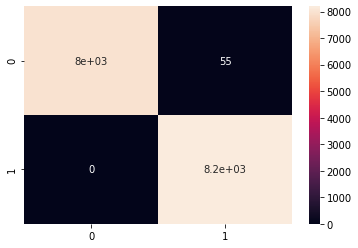

In [41]:
predicted = xgb.predict(X_test)
sns.heatmap(
    confusion_matrix(y_test, predicted), annot=True
)